In [2]:
import os
import glob
import sys
import pandas as pd
import numpy as np
# plotting modules
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [3]:
%matplotlib notebook

In [4]:
util.set_sns_style(style='dark') # plotting settings i like for Nbs

In [5]:
# Set rootdir - I usually set this to the parent dir of all the data
rootdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'

# Specify experiment to analyze
experiment = 'alternating_odor/disappearing_odor-500mm' 
src_dir = os.path.join(rootdir, experiment)

# Create a save dir for figures wherever you want
# I create a separate dir since I don't want to mess with Andy's existing organization
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}'.format(experiment)
save_dir = save_dir.replace(" ", "")
print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a label/ID for figures so you always know where the plotted data came from
fig_id = src_dir.split('/My Drive')[1] #, experiment) 

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/alternating_odor/disappearing_odor-500mm


In [11]:
# get a list of all the data files
fly='Fly2'
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, '*{}*.log'.format(fly)))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
for i, fn in enumerate(log_files):
    print("{}: {}".format(i, os.path.split(fn)[-1]))

Found 1 tracking files.
0: 11172020-191718_constantOdor_500_Fly2.log


In [10]:
glob.glob(os.path.join(src_dir, '*.log'))

['/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/alternating_odor/disappearing_odor-500mm/11172020-191718_constantOdor_500_Fly2.log',
 '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/alternating_odor/disappearing_odor-500mm/11182020-204924_constantOdor_500_Fly4.log',
 '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/alternating_odor/disappearing_odor-500mm/11172020-213853_constantOdor_500_Fly3.log',
 '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/alternating_odor/disappearing_odor-500mm/11162020-192214_disappearingOdor_500_Fly1.log']

In [7]:
file_ix = 12 # select a file
fpath = log_files[file_ix]
print("Selected: {}".format(fpath))

IndexError: list index out of range

In [9]:
# try to parse experiment details from the filename
exp, fid, cond = butil.parse_info_from_file(fpath)
# load and process the csv data  
df0 = butil.load_dataframe(fpath, mfc_id=None, verbose=False, cond=None)
print('Experiment: {}{}Fly ID: {}{}Condition: {}'.format(exp, '\n', fid, '\n', cond))
fly_id = df0['fly_id'].unique()[0]
df0.head()

Experiment: Spontaneous_edge_tracking
Fly ID: fly9
Condition: spontaneoustracking


,timestamp -- motor_step_command,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,ft_frame,...,instrip,led_on,timestamp,motor_step_command,time,date,experiment,fly_name,condition,fly_id
0,06/13/2022-16:46:25.877129 -- 800074,0.4,0.0,0.0,1.0,0.0,0,-2.224368,1.737037,33,...,False,False,06/13/2022-16:46:25.877129,800074,1.655153e+09,20220613,Spontaneous_edge_tracking,fly9,spontaneoustracking,20220613-fly9
1,06/13/2022-16:46:25.894330 -- 800068,0.4,0.0,0.0,1.0,0.0,0,-2.157491,1.867492,36,...,False,False,06/13/2022-16:46:25.894330,800068,1.655153e+09,20220613,Spontaneous_edge_tracking,fly9,spontaneoustracking,20220613-fly9
2,06/13/2022-16:46:25.927261 -- 800060,0.4,0.0,0.0,1.0,0.0,0,-2.064900,1.897961,38,...,False,False,06/13/2022-16:46:25.927261,800060,1.655153e+09,20220613,Spontaneous_edge_tracking,fly9,spontaneoustracking,20220613-fly9
3,06/13/2022-16:46:25.943984 -- 800061,0.4,0.0,0.0,1.0,0.0,0,-2.110450,1.881816,39,...,False,False,06/13/2022-16:46:25.943984,800061,1.655153e+09,20220613,Spontaneous_edge_tracking,fly9,spontaneoustracking,20220613-fly9
4,06/13/2022-16:46:25.961409 -- 800061,0.4,0.0,0.0,1.0,0.0,0,-2.122773,1.884644,40,...,False,False,06/13/2022-16:46:25.961409,800061,1.655153e+09,20220613,Spontaneous_edge_tracking,fly9,spontaneoustracking,20220613-fly9


In [10]:
# get experimentally determined odor boundaries:
odor_width=50
grid_sep=2000 # only matters for 2p
ogrid = butil.get_odor_grid(df0, 
                            odor_width=odor_width, grid_sep=grid_sep,
                            use_crossings=True, verbose=False)
(odor_xmin, odor_xmax), = ogrid.values()
print(ogrid)

{'c2126': (-40.7913320492527, 9.208667950747298)}


<IPython.core.display.Javascript object>


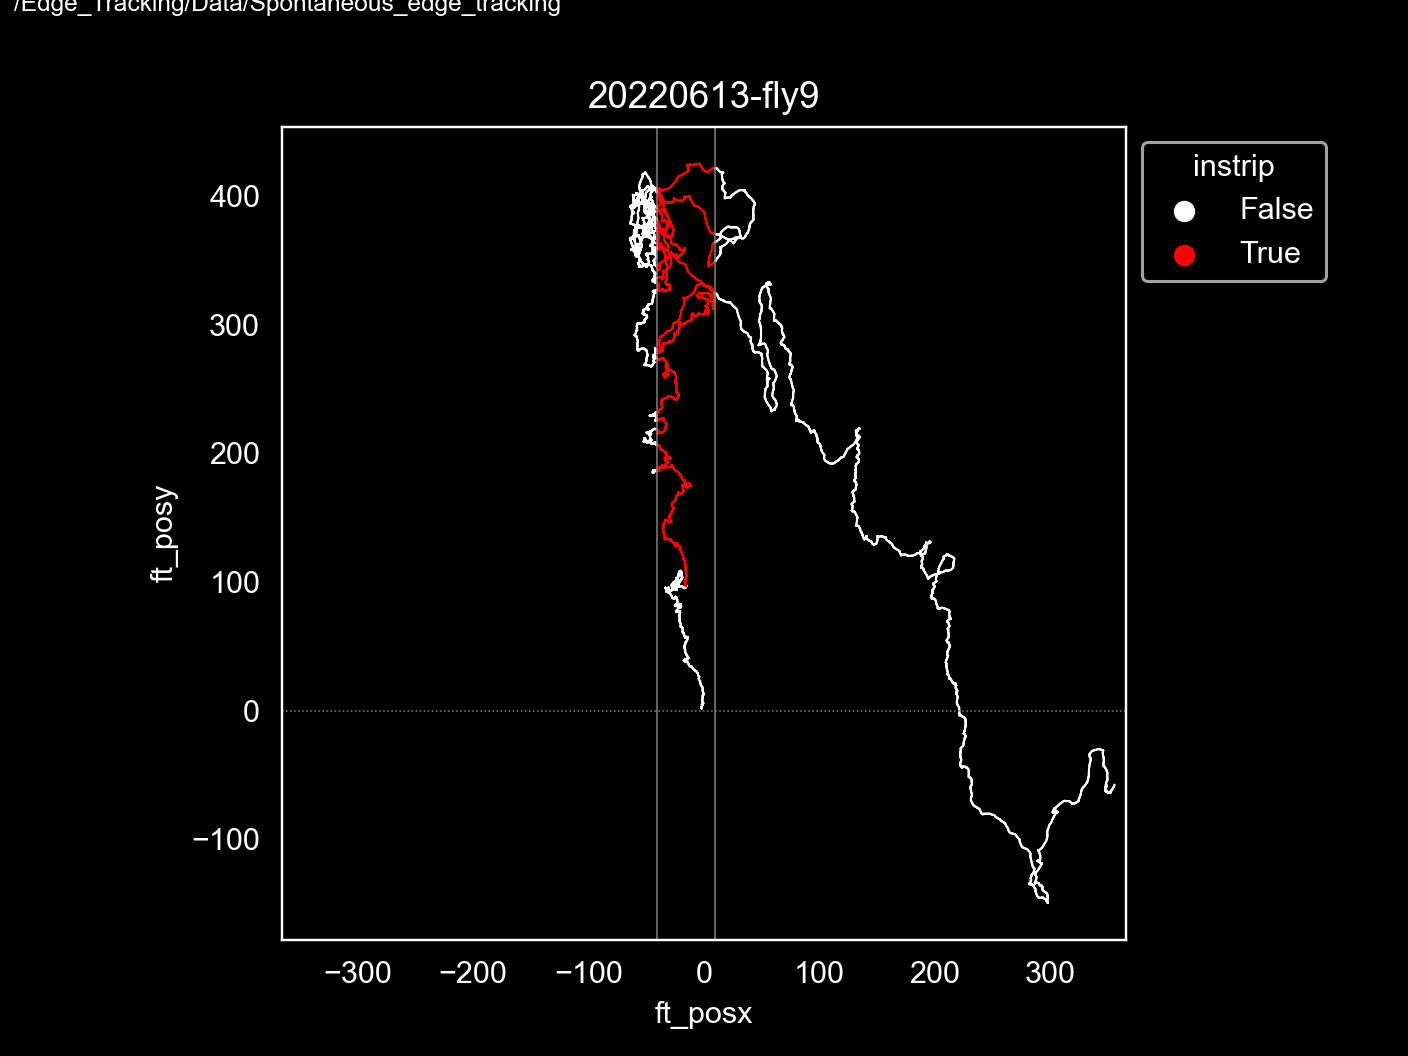

/Users/julianarhee/Documents/rutalab/data/figures/Spontaneous_edge_tracking/trajectory_20220613-fly9.png


In [11]:
# Set some plotting params 
hue_varname='instrip'
palette={True: 'r', False: 'w'}
start_at_odor = True
odor_width=50
odor_lc='lightgray'
odor_lw=0.5
# ---------------------------------------------------------------------
fig, ax = pl.subplots()
sns.scatterplot(data=df0, x="ft_posx", y="ft_posy", ax=ax, 
                hue=hue_varname, s=0.5, edgecolor='none', palette=palette)
butil.plot_odor_corridor(ax, odor_xmin=odor_xmin, odor_xmax=odor_xmax)
ax.legend(bbox_to_anchor=(1,1), loc='upper left', title=hue_varname)
ax.set_title(fly_id)
pl.subplots_adjust(left=0.2, right=0.8)
# Center corridor
xmax = np.ceil(df0['ft_posx'].abs().max())
ax.set_xlim([-xmax-10, xmax+10])
# label figure and save
util.label_figure(fig, fig_id)
figname = 'trajectory_{}'.format(fly_id)
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname))) #, dpi=dpi)
print(os.path.join(save_dir, '{}.png'.format(figname)))